In [22]:
# Import required libraries
from bs4 import BeautifulSoup
import requests
import csv
import time
import smtplib
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
# Amazon product URL
URL = "https://www.amazon.com.tr/Casio-F-91W-1Dg-Erkek-Kol-Saati/dp/B000J34HN4"

# HTTP headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:110.0) Gecko/20100101 Firefox/110.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.5",
    "DNT": "1",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
}

In [24]:
# Function to check the product price
def check_price():
    response = requests.get(URL, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract product title
    title = soup.find(id="productTitle")
    title = title.get_text().strip()

    # Extract product price
    price_element = soup.find("span", {"class": "a-price-whole"})
    price = float(price_element.get_text().replace(".", "").replace(",", "."))

    return title, price

In [25]:
# Function to log the price to a CSV file
def log_price_to_csv(title, price):
    filename = "PRICE.csv"
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")  # Fixed import here
    data = [timestamp, title, price]

    # Check if the file exists, if not create it and write the header
    try:
        with open(filename, "x", newline="", encoding="UTF8") as f:
            writer = csv.writer(f)
            writer.writerow(["Timestamp", "Product Title", "Price"])
    except FileExistsError:
        pass  # File already exists, no need to write the header again

    # Append the price data to the CSV file
    with open(filename, "a", newline="", encoding="UTF8") as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [26]:
# Function to send email
def send_email(price, title):
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login('senders_mail@gmail.com', 'senders_password')  # Replace with your email credentials

    subject = f"Price Alert: {title} is now {price} TRY!"
    body = f"The product '{title}' is now priced at {price} TRY. Check it out here: {URL}"

    msg = f"Subject: {subject}\n\n{body}"

    server.sendmail(
        'senders_mail@gmail.com',
        'your_email@gmail.com',  # Replace with your email
        msg
    )
    server.close()

    print("Email sent successfully!")

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Function to plot price history
def plot_price_history():
    filename = "PRICE.csv"
    
    try:
        # Read data from the CSV file
        data = pd.read_csv(filename)
        
        # Ensure the 'Timestamp' column is in datetime format
        data['Timestamp'] = pd.to_datetime(data['Timestamp'])
        
        # Sort data by Timestamp to ensure proper plotting
        data = data.sort_values(by='Timestamp')
        
        # Plot the price history
        plt.figure(figsize=(12, 6))
        plt.plot(data['Timestamp'], data['Price'], marker='o', linestyle='-', color='b', label='Price')
        plt.title('Price History of the Product', fontsize=16)
        plt.xlabel('Timestamp', fontsize=14)
        plt.ylabel('Price (TRY)', fontsize=14)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
    
    except FileNotFoundError:
        print(f"File {filename} not found. Make sure to run the monitoring function to generate data.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Function to monitor price and log data
def monitor_price(threshold_price):
    title, price = check_price()
    if price and price < threshold_price:
        send_email(price, title)  # Send an email if price is below the threshold
    log_price_to_csv(title, price)
    print(f"Logged price for {title}: {price}")

# Run price monitoring for a single check
threshold_price = 300  # Target price
monitor_price(threshold_price)






Logged price for Casio Collection Unisex Dijital Kol Saati F-91W: 599.0


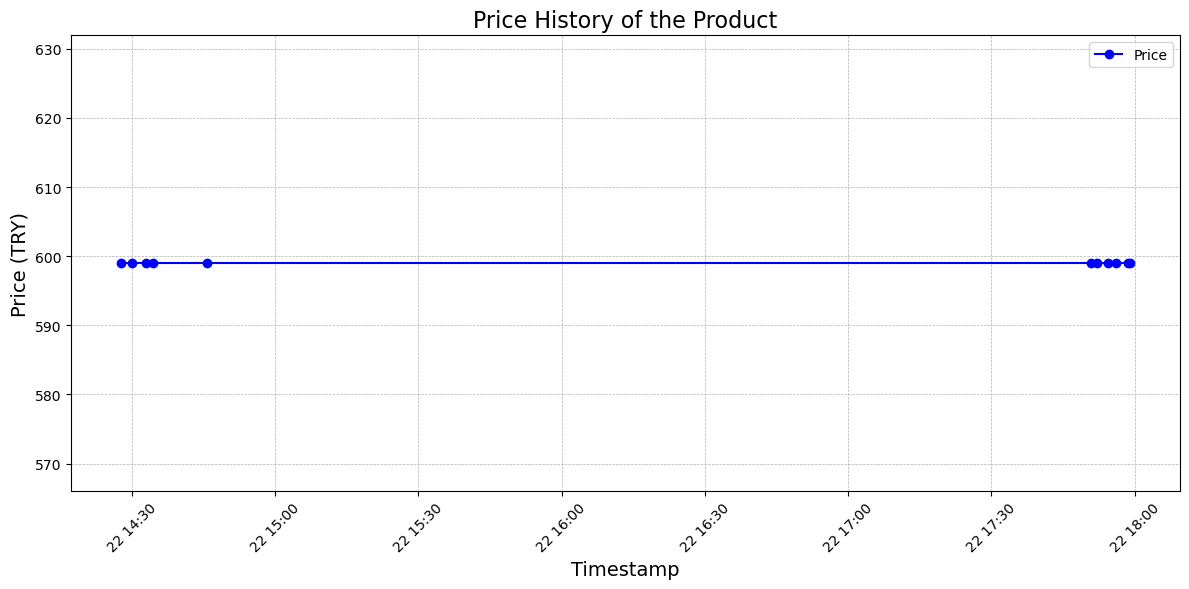

In [28]:
# Plot the price history
plot_price_history()